# Simulation Customized Node Batch

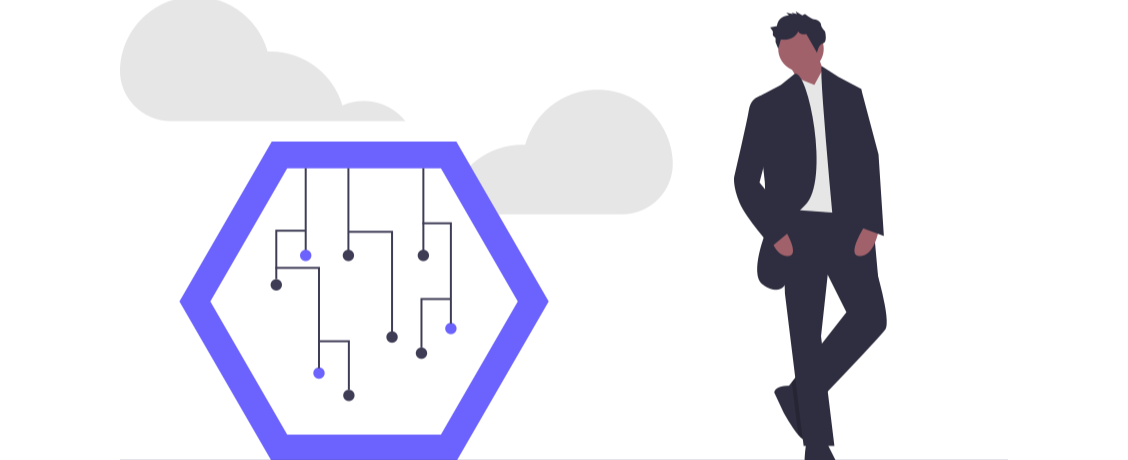

## Input arguments

In [1]:

from lib import *

config = j.tools.tfgrid_simulator.simulator_config
hwchoice_default = config.hardwareconfig
startmonth = config.startmonth

config.load();

In [2]:
#parameters for simulation
# choose your hardware profile (other choices in stead of amd or supermicro or hpe)

simulation = j.tools.tfgrid_simulator.simulation_get(name="default", hardware_config_name="amd", reload=True)

nb = simulation.nodesbatch_simulate(month=startmonth, hardware_config_name=hwchoice_default)
node_normalized=nb.node_normalized
environment2 = nb.environment;

 - tft_price_5y: 3.0
 - node_growth: 0:5,6:150,12:1000,18:2000,24:8000,36:12000,48:20000,60:20000
 - price_cu: 15.0
 - price_su: 10.0
 - price_nu: 0.05


## Environment Overview

In [3]:
md(f"""
- Hardware Investment Cost for the node batch : USD {nb.cost_hardware}
- Nr Nodes                 : {nb.nrnodes}
- ROI In Months                 : {nb.roi_months}
- the ROI after 60 months' is:  **{round(nb.roi_end,1)}**
- total amount of TFT farmed: **{nb.tft_farmed_total}**
""")


- Hardware Investment Cost for the node batch : USD 508176
- Nr Nodes                 : 16
- ROI In Months                 : 12
- the ROI after 60 months' is:  **14.8**
- total amount of TFT farmed: **685185**


## Node Overview (= 1 server)

In [4]:
md(f"""
### Normalized Node Details

- nr of TB netto usable = {round(node_normalized.production.su,0)} TB
- nr of cpu cores = {round(node_normalized.production.cru,1)} Cores
- power used = {node_normalized.total.power} watt
- performance in passmark = {round(node_normalized.production.cu_passmark*node_normalized.production.cu)}

""")


### Normalized Node Details

- nr of TB netto usable = 289.0 TB
- nr of cpu cores = 54 Cores
- power used = 806 watt
- performance in passmark = 33618



In [5]:
nb.graph_tft(single=True)

FigureWidget({
    'data': [{'name': 'farmed',
              'type': 'scatter',
              'uid': '041caab7…

In [6]:
nb.graph_usd(single=True)

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'farmed',
              'type': 'scat…

In [7]:
nb.graph_usd(single=True,cumul=True)

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'farmed',
              'type': 'scat…

### Token price per month

In [8]:
simulation.graph_token_price()

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '8ffe79c0-ce9e-4cbf-8c67-e5fc9422eb61',
 …

In [9]:
simulation.graph_nr_nodes()

FigureWidget({
    'data': [{'name': 'new nodes',
              'type': 'scatter',
              'uid': 'bc807…

## P&L Reports


In [10]:
md(nb.markdown_profit_loss(20))


## P&L report for month 20

### nodesbatch

- added to grid in month : 1
- nrnodes                : 16
- investment hardware    : 508k

### cloud units

- #cu                   : 1,735
- #su                   : 4.7k
- #nu                   : 202k

### simulation params in this month

- utilization           : 0.8
- price decline         : 0.13
- cu price              : 13
- su price              : 8.8
- nu price              : 0.05

### revenues with utilization in account

- rev cu                : 18k
- rev su                : 32k
- rev nu                : 8.1k
- rev total             : 59k

### revenues if all resources used

- rev cu                : 22k
- rev su                : 41k
- rev nu                : 10k
- rev total             : 74k


### costs

- cost hardware         : 8.5k
- cost power            : 1,113
- cost maintenance      : 846
- cost rackspace        : 528
- cost network          : 2,044
- cost total            : 13k

### profit this month

- margin                : 48k
- margin ma             : 61k

### valuation parameters

- price_cu              : 15.0
- price_su              : 10.0
- price_nu              : 0.05

### valuation report

- valuation based on 30 months of REVENUE
- valuation is          : 2,224k




In [11]:
md(nb.markdown_profit_loss(60))


## P&L report for month 60

### nodesbatch

- added to grid in month : 1
- nrnodes                : 16
- investment hardware    : 508k

### cloud units

- #cu                   : 1,735
- #su                   : 4.7k
- #nu                   : 202k

### simulation params in this month

- utilization           : 0.9
- price decline         : 0.4
- cu price              : 10
- su price              : 7.1
- nu price              : 0.05

### revenues with utilization in account

- rev cu                : 16k
- rev su                : 29k
- rev nu                : 9.1k
- rev total             : 55k

### revenues if all resources used

- rev cu                : 18k
- rev su                : 33k
- rev nu                : 10k
- rev total             : 61k


### costs

- cost hardware         : 8.5k
- cost power            : 1,252
- cost maintenance      : 846
- cost rackspace        : 528
- cost network          : 2,300
- cost total            : 13k

### profit this month

- margin                : 44k
- margin ma             : 48k

### valuation parameters

- price_cu              : 15.0
- price_su              : 10.0
- price_nu              : 0.05

### valuation report

- valuation based on 30 months of REVENUE
- valuation is          : 1,858k




# Details

In [12]:
config


## threefold.simulation.config
 - name                : default
 - tft_pricing_type    : FIXED
 - tft_price_5y        : 3.00
 - node_growth         : 600,000
 - startmonth          : 1
 - hardwareconfig      : A_dc_rack

    ## threefold.simulation.pricing
     - price_cu            : 15.00
     - price_su            : 10.00
     - price_nu            : 0.05
    


    ## threefold.simulation.tokenomics
     - cpr_investment_usd  : 30
     - burn_percent        : 0
    


    ## threefold.simulation.network
     - nu_multiplier_from_cu: 10
     - nu_multiplier_from_su: 40
    


    ## threefold.simulation.cloudvaluation.config
     - price_cu            : 15.00
     - price_su            : 10.00
     - price_nu            : 0.05
     - revenue_months      : 30
     - margin_months       : 60
     - indextype           : REVENUE
     - tft_price_5y_baseline: 4
    



## Normalized Node Details

In [13]:
node_normalized


## threefold.simulation.device_or_environment
 - name                : normalized_device_a.dc.rack
 - description         : 
 - device_template_name: normalized

    ## threefold.simulation.bom.production
     - cpr                 : 450
     - cru                 : 54
     - sru                 : 7,080
     - hru                 : 276,000
     - mru                 : 432
     - su                  : 289.00
     - cu                  : 107.75
     - nu_used_month       : 12,637
     - cu_perc             : 32.07%
     - su_perc             : 67.93%
     - cu_passmark         : 312
     - cost_nu_month       : 159
    


    ## threefold.simulation.bom.total
     - cost_hardware       : 31,761
     - power               : 806
     - power_kwh_month     : 579
     - rackspace_u         : 2.75
     - cost_hardware_month : 529
     - cost_rack_month     : 33
     - cost_power_month    : 87.0
     - cost_maintenance_month: 52.9
     - cost_total_month    : 702
    


    ## threefold.simul

## Environment Details


In [14]:
environment2


## threefold.simulation.device_or_environment
 - name                : A_dc_rack
 - description         : 
 - device_template_name: 

    ## threefold.simulation.bom.production
     - cpr                 : 7,200
     - cru                 : 864
     - sru                 : 113,280
     - hru                 : 4,416,000
     - mru                 : 6,912
     - su                  : 4624.00
     - cu                  : 1724.00
     - nu_used_month       : 202,192
     - cu_perc             : 32.07%
     - su_perc             : 67.93%
     - cu_passmark         : 4,998
     - cost_nu_month       : 2,556
    


    ## threefold.simulation.bom.total
     - cost_hardware       : 508,190
     - power               : 12,898
     - power_kwh_month     : 9,276
     - rackspace_u         : 44.00
     - cost_hardware_month : 8,469
     - cost_rack_month     : 528
     - cost_power_month    : 1,391
     - cost_maintenance_month: 846
     - cost_total_month    : 11,235
    


    ## threefold.simu

In [15]:
environment2.devices.compute


## threefold.simulation.device_or_environment
 - name                : compute
 - description         : 
 - device_template_name: hpe_compute_server

    ## threefold.simulation.bom.production
     - cpr                 : 335
     - cru                 : 64
     - sru                 : 7,680
     - hru                 : 96,000
     - mru                 : 512
     - su                  : 144.00
     - cu                  : 127.75
     - nu_used_month       : 7,037
     - cu_perc             : 42.54%
     - su_perc             : 57.46%
     - cu_passmark         : 283
     - cost_nu_month       : 89.0
    


    ## threefold.simulation.bom.total
     - cost_hardware       : 20,120
     - power               : 698
     - power_kwh_month     : 502
     - rackspace_u         : 2.00
     - cost_hardware_month : 335
     - cost_rack_month     : 24
     - cost_power_month    : 75.3
     - cost_maintenance_month: 33.5
     - cost_total_month    : 468
    


    ## threefold.simulation.bom.cos

In [16]:
try:
    a= environment2.devices.storage
except:
    a=""
a


## threefold.simulation.device_or_environment
 - name                : storage
 - description         : 
 - device_template_name: hpe_storage_server

    ## threefold.simulation.bom.production
     - cpr                 : 703
     - cru                 : 32
     - sru                 : 5,760
     - hru                 : 672,000
     - mru                 : 256
     - su                  : 608.00
     - cu                  : 63.75
     - nu_used_month       : 24,957
     - cu_perc             : 9.02%
     - su_perc             : 90.98%
     - cu_passmark         : 377
     - cost_nu_month       : 315
    


    ## threefold.simulation.bom.total
     - cost_hardware       : 55,574
     - power               : 1,004
     - power_kwh_month     : 722
     - rackspace_u         : 4.00
     - cost_hardware_month : 926
     - cost_rack_month     : 48
     - cost_power_month    : 108
     - cost_maintenance_month: 92.6
     - cost_total_month    : 1,175
    


    ## threefold.simulation.bom.c

## Node Batch Details

In [17]:
nb.simulated_months=[]
nb


## threefold.simulation.nodesbatch
 - name                : nodesbatch_simulate_A_dc_rack_1
 - batch_nr            : 1
 - nrnodes             : 16
 - month_start         : 1
 - months_left         : 60
 - tft_farmed_before_simulation: 0.00
 - cpr                 : 7248.24
 - cpr_improve         : 0.01

 - cost_hardware               |  8.5k|  8.5k|  8.5k|  8.5k|  8.5k|  8.5k|   8.5k|   8.5k|   8.5k|   8.5k|   8.5k
 - cost_maintenance            |   846|   846|   846|   846|   846|   846|    846|    846|    846|    846|    846
 - cost_network                |   511|   511|   511|   511|   613|   736|    858|    981|  1,104|  1,226|  1,349
 - cost_power                  |   278|   278|   278|   278|   333|   400|    467|    534|    601|    667|    734
 - cost_rackspace              |   528|   528|   528|   528|   528|   528|    528|    528|    528|    528|    528
 - cost_total                  |   10k|   10k|   10k|   10k|   10k|   10k|    11k|    11k|    11k|    11k|    11k
 - difficul